<a href="https://colab.research.google.com/github/msaimam98/COVIDDataAnalysis/blob/master/covid19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Configuration & Downloading Data
1. Set up the kaggle API
2. Download and unzip the datasets

In [1]:
# setup the kaggle API
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p ~/.kaggle
!cp 'drive/My Drive/Colab Notebooks/kaggle/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install --upgrade --force-reinstall --no-deps kaggle

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
     |████████████████████████████████| 61kB 4.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=051a3dcb14a1da8f93d4b63a7aee87d97b45feec51106757ee17c6962c338315
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [2]:
# load datasets (kaggle: Novel-Corona-Virus-2019-dataset managed by SRK)
import zipfile

!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset -f covid_19_data.csv

with zipfile.ZipFile('./covid_19_data.csv.zip', 'r') as zip_ref:
  zip_ref.extractall('./covid_19_data')

  0% 0.00/252k [00:00<?, ?B/s]
100% 252k/252k [00:00<00:00, 102MB/s]


## Overall Data Info
1. Read the csv file and observe the overall data
2. Observe the daily transition of COVID-19 cases

In [3]:
# obtain data using Pandas
import pandas as pd

data = pd.read_csv("./covid_19_data/covid_19_data.csv", index_col="SNo", parse_dates=["ObservationDate"])
print(f"Data shape: {data.shape}\n")

data

Data shape: (21866, 7)



,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
21862,2020-05-05,Wyoming,US,2020-05-06 02:32:31,604.0,7.0,0.0
21863,2020-05-05,Xinjiang,Mainland China,2020-05-06 02:32:31,76.0,3.0,73.0
21864,2020-05-05,Yukon,Canada,2020-05-06 02:32:31,11.0,0.0,0.0


In [4]:
# summary function (not very useful here)
data.describe()

,Confirmed,Deaths,Recovered
count,21866.000000,21866.000000,21866.000000
mean,4186.011479,267.482027,1149.608250
std,19133.805875,1814.574950,7981.896646
min,0.000000,0.000000,0.000000
25%,13.000000,0.000000,0.000000
50%,136.000000,2.000000,3.000000
75%,946.000000,14.000000,111.000000
max,321192.000000,29427.000000,189791.000000


In [5]:
# obtain ObservationDate vs (Confirmed/Deaths/Recovered) data
confirmed_vs_date = data.groupby("ObservationDate").Confirmed.sum()
deaths_vs_date = data.groupby("ObservationDate").Deaths.sum()
recovered_vs_date = data.groupby("ObservationDate").Recovered.sum()

daily_data = pd.concat([confirmed_vs_date, deaths_vs_date, recovered_vs_date], axis=1)
daily_data

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-05-01,3343777.0,238650.0,1053327.0
2020-05-02,3427343.0,243808.0,1093112.0
2020-05-03,3506729.0,247470.0,1125236.0


## Visualize the data
1. Cumulative Confirmed Cases vs Observation Date
2. Cumulative Deaths vs Observation Date
3. Cumulative Recovered Cases vs Observation Date

In [6]:
# visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


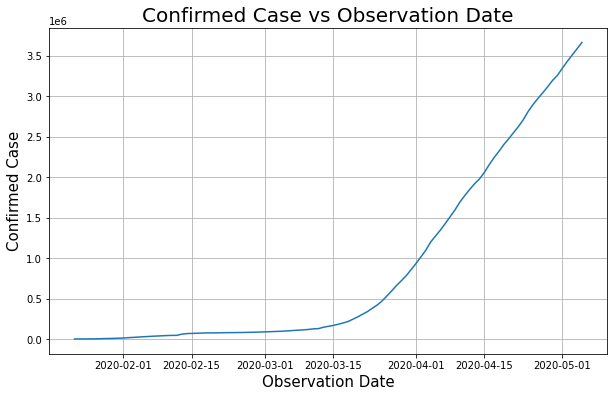

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_data.index, y=daily_data.Confirmed)
plt.grid()
plt.title("Confirmed Case vs Observation Date", fontsize=20)
plt.ylabel("Confirmed Case", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

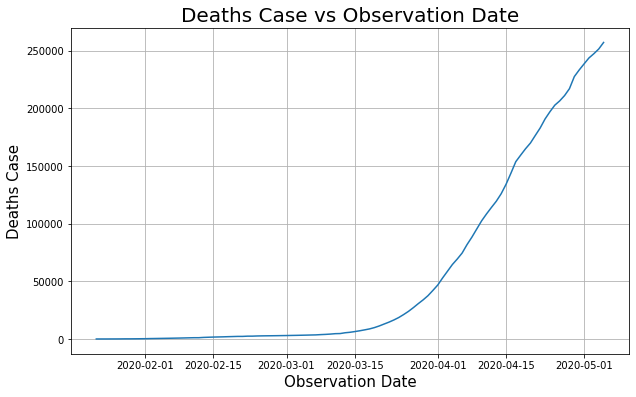

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_data.index, y=daily_data.Deaths)
plt.grid()
plt.title("Deaths Case vs Observation Date", fontsize=20)
plt.ylabel("Deaths Case", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

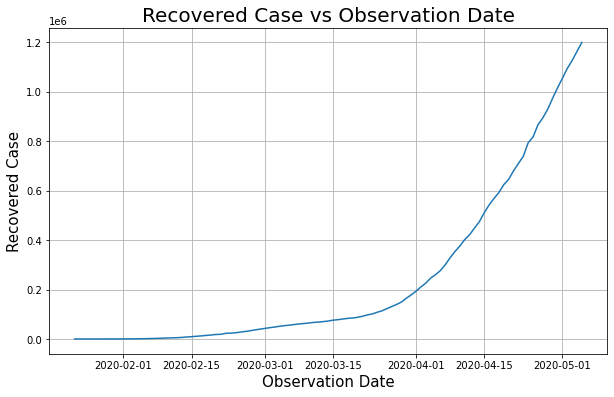

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_data.index, y=daily_data.Recovered)
plt.grid()
plt.title("Recovered Case vs Observation Date", fontsize=20)
plt.ylabel("Recovered Case", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

## Daily transition of COVID-19 cases
1. Group the data by observed date and country
2. China -- daily transition
3. USA -- daily transition
4. Japan -- daily transition

In [10]:
# Group the data by ObservationDate and Country/Region

daily_country_data = data.groupby(["ObservationDate", "Country/Region"]) \
                    [["Confirmed", "Deaths", "Recovered"]].sum().reset_index()

daily_country_data

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Hong Kong,0.0,0.0,0.0
1,2020-01-22,Japan,2.0,0.0,0.0
2,2020-01-22,Macau,1.0,0.0,0.0
3,2020-01-22,Mainland China,547.0,17.0,28.0
4,2020-01-22,South Korea,1.0,0.0,0.0
...,...,...,...,...,...
12043,2020-05-05,West Bank and Gaza,371.0,2.0,127.0
12044,2020-05-05,Western Sahara,6.0,0.0,5.0
12045,2020-05-05,Yemen,22.0,4.0,1.0
12046,2020-05-05,Zambia,138.0,3.0,92.0


In [11]:
# Example 1: China -- daily transition
daily_country_data.query('`Country/Region` == "Mainland China"').set_index("ObservationDate")

,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,Mainland China,547.0,17.0,28.0
2020-01-23,Mainland China,639.0,18.0,30.0
2020-01-24,Mainland China,916.0,26.0,36.0
2020-01-25,Mainland China,1399.0,42.0,39.0
2020-01-26,Mainland China,2062.0,56.0,49.0
...,...,...,...,...
2020-05-01,Mainland China,82875.0,4633.0,77679.0
2020-05-02,Mainland China,82875.0,4633.0,77685.0
2020-05-03,Mainland China,82880.0,4633.0,77766.0


In [12]:
# Example 2: US -- daily transition
daily_country_data.query('`Country/Region` == "US"').set_index("ObservationDate")

,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,US,1.0,0.0,0.0
2020-01-23,US,1.0,0.0,0.0
2020-01-24,US,2.0,0.0,0.0
2020-01-25,US,2.0,0.0,0.0
2020-01-26,US,5.0,0.0,0.0
...,...,...,...,...
2020-05-01,US,1103461.0,64943.0,164015.0
2020-05-02,US,1132539.0,66369.0,175382.0
2020-05-03,US,1158040.0,67682.0,180152.0


In [13]:
# Example 3: Japan -- daily transition
daily_country_data.query('`Country/Region` == "Japan"').set_index("ObservationDate")

,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,Japan,2.0,0.0,0.0
2020-01-23,Japan,1.0,0.0,0.0
2020-01-24,Japan,2.0,0.0,0.0
2020-01-25,Japan,2.0,0.0,0.0
2020-01-26,Japan,4.0,0.0,1.0
...,...,...,...,...
2020-05-01,Japan,14305.0,455.0,2975.0
2020-05-02,Japan,14571.0,474.0,3205.0
2020-05-03,Japan,14877.0,487.0,3981.0


## Choropleth Graph
1. The Spread of COVID-19 Cases Across World
2. The Spread of COVID-19 Deaths Across World
3. The COVID-19 Recovery Rate Across World

In [0]:
# plotly: interactive graphing library for Python
import plotly.offline as py
import plotly.express as px

# numpy lirary
import numpy as np

# obtain a copy of daily_country_data
choropleth_data = daily_country_data.copy()

# fix ObservationDate datatype from Timesatmp to String
choropleth_data.ObservationDate = choropleth_data.ObservationDate.astype(str)

# take logarithms (Confirmed, Deaths, Recovered)
choropleth_data["Confirmed (logarithmic scale)"] = np.log1p(choropleth_data.Confirmed)
choropleth_data["Deaths (logarithmic scale)"] = np.log1p(choropleth_data.Deaths)
choropleth_data["Recovered (logarithmic scale)"] = np.log1p(choropleth_data.Recovered)

# calculate the recovery rate
choropleth_data["RecoveryRate"] = (choropleth_data.Recovered / (choropleth_data.Confirmed+1e-6)).round(3)

In [15]:
# Plotting a Running Map for observing the spread of COVID-19 Confirmed Cases

fig = px.choropleth(choropleth_data, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="Confirmed (logarithmic scale)", 
                    hover_name="Country/Region",
                    projection="mercator",
                    animation_frame="ObservationDate",
                    width=1000, 
                    height=800,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='The Spread of COVID-19 Cases Across World')

py.offline.iplot(fig)

In [16]:
# Plotting a Running Map for observing the spread of COVID-19 deaths

fig = px.choropleth(choropleth_data, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="Deaths (logarithmic scale)",
                    hover_name="Country/Region",
                    projection="mercator",
                    animation_frame="ObservationDate",
                    width=1000, 
                    height=800,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='The Spread of COVID-19 Deaths Across World')

py.offline.iplot(fig)

In [17]:
# Plotting a Running Map for observing the COVID-19 recovery rate

fig = px.choropleth(choropleth_data, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="RecoveryRate",
                    hover_name="Country/Region",
                    projection="mercator",
                    animation_frame="ObservationDate",
                    width=1000, 
                    height=800,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='The COVID-19 Recovery Rate Across World')

py.offline.iplot(fig)